In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.datasets import load_iris, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [30]:
X, y = make_classification(n_samples=300, n_features=5, n_informative=3, n_classes=2)

In [31]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.7, random_state=34)

In [32]:
X_tr.shape

(210, 5)

In [33]:
X_te.shape

(90, 5)

In [34]:
model = LogisticRegression()

In [35]:
model.fit(X_tr, y_tr)

LogisticRegression()

In [36]:
model.score(X_tr, y_tr)

0.8809523809523809

In [37]:
y_pr = model.predict(X_te)

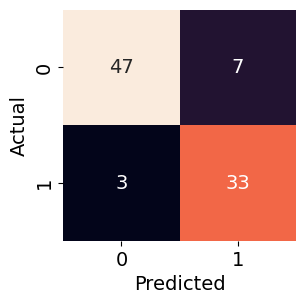

In [65]:
plt.figure(figsize=(3, 3))
plt.rcParams["font.size"]=14
sns.heatmap(confusion_matrix(y_te, y_pr), annot=True, cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [73]:
tn, fp, fn, tp = confusion_matrix(y_te, y_pr).ravel()

In [74]:
tp, fp, fn, tn

(33, 7, 3, 47)

In [75]:
accuracy_score(y_te, y_pr)

0.8888888888888888

In [76]:
(tp+tn)/(tp+tn+fp+fn)

0.8888888888888888

In [77]:
print(classification_report(y_te, y_pr))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        54
           1       0.82      0.92      0.87        36

    accuracy                           0.89        90
   macro avg       0.88      0.89      0.89        90
weighted avg       0.89      0.89      0.89        90



In [80]:
precision = tp/(tp+fp)
precision

0.825

In [81]:
recall = tp/(tp+fn)
recall

0.9166666666666666

In [83]:
f1_score = (2*precision*recall)/(precision+recall)
f1_score

0.8684210526315789

In [88]:
y_pr_prob = model.predict_proba(X_te)[:,1]

In [89]:
y_pr_prob

array([8.60609490e-03, 1.23935039e-02, 9.26697857e-01, 6.02336327e-07,
       7.80975323e-01, 9.61591554e-01, 9.04595828e-01, 3.31627012e-01,
       7.80327429e-03, 2.71892511e-01, 1.15549628e-03, 1.75451674e-02,
       1.39203307e-01, 4.11368527e-02, 3.12433720e-02, 2.65649064e-01,
       2.69005805e-02, 2.06678029e-01, 1.97425291e-01, 9.27022591e-01,
       8.44612622e-01, 4.46767953e-04, 3.33608272e-03, 9.60981482e-01,
       9.78114013e-01, 2.67566688e-01, 1.80756653e-02, 9.95000531e-01,
       9.67117921e-01, 1.14401142e-01, 9.37898782e-01, 3.91622566e-01,
       9.42350567e-01, 8.10047148e-01, 9.26534732e-01, 9.97936450e-01,
       6.71536754e-01, 4.69240536e-01, 5.89909245e-01, 1.49411560e-02,
       2.14667288e-03, 8.71925286e-01, 8.69728479e-01, 4.17911246e-01,
       9.07584565e-01, 3.01320590e-01, 7.63486550e-01, 2.20809534e-01,
       3.22049439e-02, 3.23452769e-01, 9.28667454e-01, 9.42728890e-01,
       4.46901021e-05, 1.58025826e-02, 6.22806916e-01, 8.19613031e-02,
      

In [90]:
fpr, tpr, threshold = roc_curve(y_te, y_pr_prob)

In [91]:
fpr, tpr, threshold

(array([0.        , 0.        , 0.01851852, 0.01851852, 0.03703704,
        0.03703704, 0.07407407, 0.07407407, 0.09259259, 0.09259259,
        0.12962963, 0.12962963, 0.16666667, 0.16666667, 0.2037037 ,
        0.2037037 , 0.55555556, 0.55555556, 1.        ]),
 array([0.        , 0.02777778, 0.02777778, 0.58333333, 0.58333333,
        0.69444444, 0.69444444, 0.83333333, 0.83333333, 0.88888889,
        0.88888889, 0.91666667, 0.91666667, 0.94444444, 0.94444444,
        0.97222222, 0.97222222, 1.        , 1.        ]),
 array([           inf, 9.99052915e-01, 9.97936450e-01, 9.23650677e-01,
        9.17481788e-01, 8.71925286e-01, 8.69728479e-01, 7.80975323e-01,
        7.63486550e-01, 6.46235847e-01, 5.89909245e-01, 5.73361072e-01,
        4.17911246e-01, 4.14486167e-01, 3.91622566e-01, 3.38589983e-01,
        1.08913402e-01, 8.95412839e-02, 6.02336327e-07]))

In [92]:
auc_score = auc(fpr, tpr)
auc_score

0.9408436213991769

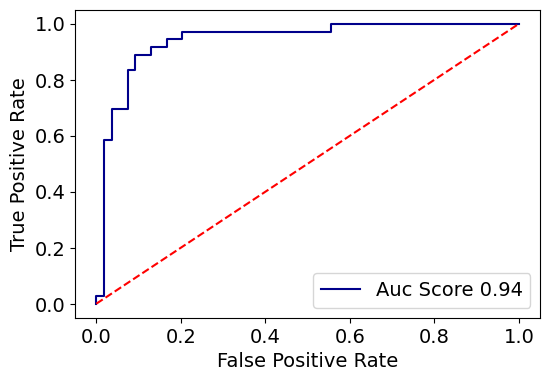

In [106]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="darkblue", label=f"Auc Score {np.round(auc_score, 2)}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0,1], color="red", ls="--")
plt.legend()
plt.show()

In [126]:
dt_model = DecisionTreeClassifier(max_depth=3)

In [127]:
dt_model.fit(X_tr, y_tr)

DecisionTreeClassifier(max_depth=3)

In [128]:
dt_y_pr = dt_model.predict(X_te)

In [129]:
dt_y_pr_prob = dt_model.predict_proba(X_te)[:,1]

In [130]:
dt_y_pr_prob

array([0.        , 0.25      , 0.94949495, 0.        , 0.94949495,
       0.61538462, 0.94949495, 0.36363636, 0.        , 0.94949495,
       0.        , 0.        , 0.        , 0.        , 0.25      ,
       0.36363636, 0.        , 0.25      , 0.36363636, 0.94949495,
       0.36363636, 0.        , 0.        , 0.94949495, 0.94949495,
       0.25      , 0.        , 0.94949495, 0.94949495, 0.        ,
       0.94949495, 0.        , 0.94949495, 0.94949495, 0.94949495,
       0.94949495, 0.94949495, 0.94949495, 0.94949495, 0.25      ,
       0.        , 0.94949495, 0.94949495, 0.61538462, 0.94949495,
       0.61538462, 0.61538462, 0.        , 0.        , 0.36363636,
       0.94949495, 0.61538462, 0.        , 0.        , 0.61538462,
       0.        , 0.        , 0.        , 0.94949495, 0.        ,
       0.36363636, 0.94949495, 0.94949495, 0.94949495, 0.25      ,
       0.94949495, 0.36363636, 0.94949495, 0.        , 0.        ,
       0.        , 0.        , 0.36363636, 0.        , 0.     

In [131]:
dt_fpr, dt_tpr, dt_th = roc_curve(y_te, dt_y_pr_prob)

In [132]:
dt_auc = auc(dt_fpr, dt_tpr)

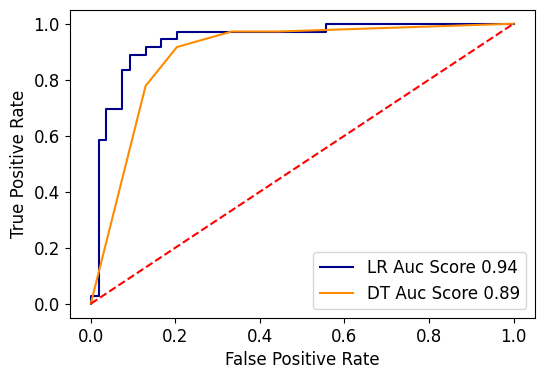

In [133]:
plt.figure(figsize=(6, 4))
plt.rcParams["font.size"]=12
plt.plot(fpr, tpr, color="darkblue", label=f"LR Auc Score {np.round(auc_score, 2)}")
plt.plot(dt_fpr, dt_tpr, color="darkorange", label = f"DT Auc Score {dt_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0,1], color="red", ls="--")
plt.legend()
plt.show()